# Cleaning db

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

%matplotlib inline

In [3]:
pd.options.display.max_columns = 100

In [4]:
df = pd.read_csv('encuesta.csv')
zat = pd.read_csv('zat.csv', sep=";")

In [5]:
del df['FACTOR_AJUSTE']
del df['FACTOR_AJUSTE_TRANSMILENIO']
del df['PI_K_I']
del df['PI_K_II']
del df['PI_K_III']
del df['FE_TOTAL']
del df['PONDERADOR_CALIBRADO_VIAJES']
del df['PONDERADOR_CALIBRADO']

In [6]:
zat[:1]

,Geo Point,Geo Shape,y_coord,Zona_Num_N,id,x_coord,AREA
0,"4.15933500918, -74.3928242522","{""type"": ""Polygon"", ""coordinates"": [[[-74.2097...",4.159335,800,6,-74.392824,1821.94


In [7]:
df[:1]

,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL
0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.merge(zat, left_on='ZAT_ORIGEN', right_on='Zona_Num_N')
df.rename({'y_coord':'y_coord_org', 'x_coord': 'x_coord_org'}, inplace=True, axis=1)
df.drop(['id','Zona_Num_N', 'AREA', 'Geo Shape', 'Geo Point'], inplace=True, axis=1)

df = df.merge(zat, left_on='ZAT_DESTINO', right_on='Zona_Num_N')
df.rename({'y_coord':'y_coord_dest', 'x_coord': 'x_coord_dest'}, inplace=True, axis=1)
df.drop(['id','Zona_Num_N', 'AREA', 'Geo Shape', 'Geo Point'], inplace=True, axis=1)

In [9]:
df[:1]

,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest
0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238,566,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN,4.611812,-74.19115,4.652134,-74.068821


In [10]:
df.MUNICIPIO_DESTINO.value_counts()

BOGOTA-DC 11001                  85283
SOACHA-cundinamarca 25754         7332
FACATATIVA-cundinamarca 25269     6436
CHIA-cundinamarca 25175           6281
ZIPAQUIRA-cundinamarca 25899      6028
FUNZA-cundinamarca 25286          3549
TOCANCIPA-cundinamarca 25817      3291
MADRID-cundinamarca 25430         3203
MOSQUERA-cundinamarca 25473       3188
COTA-cundinamarca 25214           2930
CAJICA-cundinamarca 25126         2598
SOPO-cundinamarca 25758           2504
LA CALERA 25377                   2351
BOJACA-cundinamarca 25099         2312
GACHANCIPA-cundinamarca 25295     2199
SIBATE-cundinamarca 25740         1974
TENJO-cundinamarca 25799          1828
TABIO-cundinamarca 25785          1663
Name: MUNICIPIO_DESTINO, dtype: int64

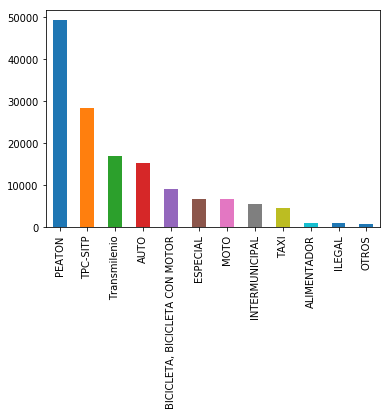

In [11]:
df.MEDIO_PREDOMINANTE.value_counts(dropna=False, normalize=False).plot(kind='bar')

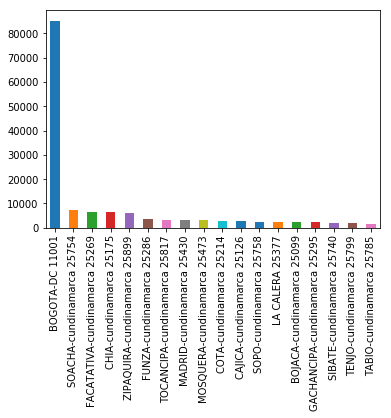

In [12]:
df.MUNICIPIO_ORIGEN.value_counts().plot(kind='bar')

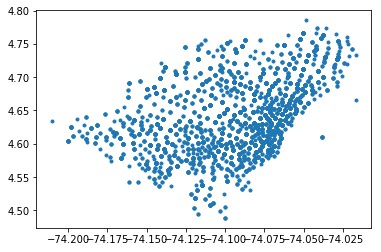

In [13]:
plt.plot(df.loc[(df.MUNICIPIO_ORIGEN.str.contains('BOGOTA') == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), 'x_coord_org'], df.loc[(df.MUNICIPIO_ORIGEN.str.contains("BOGOTA") == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), 'y_coord_org'], '.')


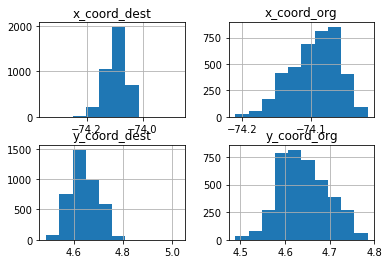

In [14]:
df.loc[(df.MUNICIPIO_ORIGEN.str.contains('BOGOTA') == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), ['x_coord_org','y_coord_org','x_coord_dest','y_coord_dest']].hist();

In [15]:
df.to_csv('./encuesta_corregida.csv')

---

# Distribution

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

%matplotlib inline

In [17]:
df = pd.read_csv('encuesta_corregida.csv')
df.loc[df.HORA_FIN.str.contains("24:00:00"), "HORA_FIN"] = "00:00:00"
df.loc[:,'HORA_FIN'] = pd.to_datetime(df.HORA_FIN, format="%H:%M:%S")
df.loc[:,'HORA_INICIO'] = pd.to_datetime(df.HORA_INICIO, format="%H:%M:%S")

In [18]:
df[:1]

,Unnamed: 0,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest
0,0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,1900-01-01 08:05:00,1900-01-01 09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN,4.611812,-74.19115,4.652134,-74.068821


In [19]:
df.MEDIO_PREDOMINANTE.unique()

array(['TPC-SITP', 'PEATON', 'Transmilenio', 'ESPECIAL', 'AUTO', 'MOTO',
       'TAXI', 'BICICLETA, BICICLETA CON MOTOR', 'OTROS', 'ILEGAL',
       'ALIMENTADOR', 'INTERMUNICIPAL'], dtype=object)

In [20]:
df = df.loc[(df.MUNICIPIO_DESTINO == 'BOGOTA-DC 11001') & (df.MUNICIPIO_ORIGEN == 'BOGOTA-DC 11001') & (df.MEDIO_PREDOMINANTE == 'TAXI')]

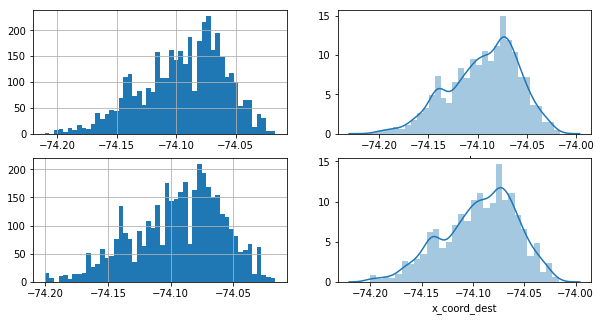

In [21]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(5)
fig.set_figwidth(10)

df.x_coord_org.hist(bins=50, ax=axs[0,0])
sns.distplot(df.x_coord_org, ax=axs[0,1])

df.x_coord_dest.hist(bins=50, ax=axs[1,0])
sns.distplot(df.x_coord_dest, ax=axs[1,1])

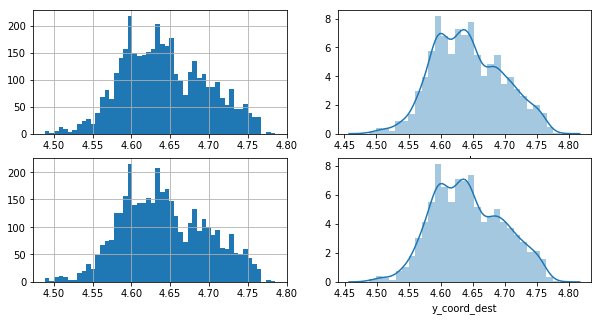

In [22]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(5)
fig.set_figwidth(10)

df.y_coord_org.hist(bins=50, ax=axs[0,0])
sns.distplot(df.y_coord_org, ax=axs[0,1])

df.y_coord_dest.hist(bins=50, ax=axs[1,0])
sns.distplot(df.y_coord_dest, ax=axs[1,1]);

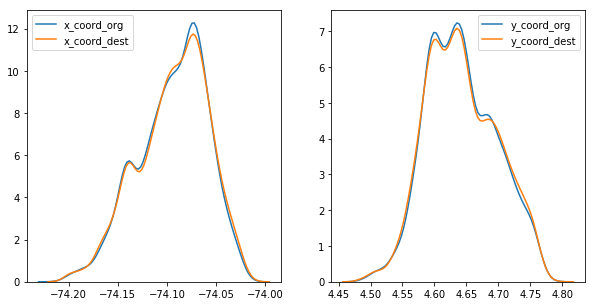

In [23]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

sns.kdeplot(df.x_coord_org, ax=axs[0])
sns.kdeplot(df.x_coord_dest, ax=axs[0])

sns.kdeplot(df.y_coord_org, ax=axs[1])
sns.kdeplot(df.y_coord_dest, ax=axs[1]);

In [24]:
for i in range(24):
    fig = sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'x_coord_org'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=-74.2,upper=-74)
    fig.figure.savefig('imgs/x_org/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'y_coord_org'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=4.3,upper=4.9)
    fig.figure.savefig('imgs/y_org/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_FIN.dt.hour == i,'x_coord_dest'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=-74.2,upper=-74)
    fig.figure.savefig('imgs/x_dest/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_FIN.dt.hour == i,'y_coord_dest'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=4.3,upper=4.9)
    fig.figure.savefig('imgs/y_dest/'+str(i)+'.png')
    plt.clf();

In [25]:
for i in range(24):
    print(i, df.loc[df.HORA_INICIO.dt.hour == i,'x_coord_org'].shape)

(0, (3,))
(1, (8,))
(2, (9,))
(3, (18,))
(4, (65,))
(5, (98,))
(6, (271,))
(7, (254,))
(8, (234,))
(9, (235,))
(10, (239,))
(11, (226,))
(12, (311,))
(13, (205,))
(14, (197,))
(15, (269,))
(16, (223,))
(17, (292,))
(18, (217,))
(19, (191,))
(20, (114,))
(21, (76,))
(22, (111,))
(23, (57,))


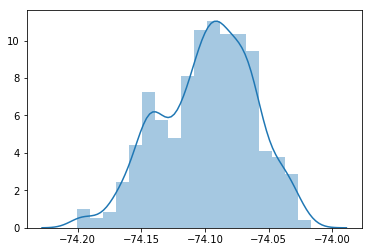

In [26]:
# dist only for hours between 00:00 and 09:59
sns.distplot(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'x_coord_org'].values)

In [27]:
gm = GaussianMixture(4)
gm.fit(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'x_coord_org'].values.reshape(-1, 1));

In [28]:
gm.means_

array([[-74.09844001],
       [-74.0412793 ],
       [-74.14261345],
       [-74.07026149]])

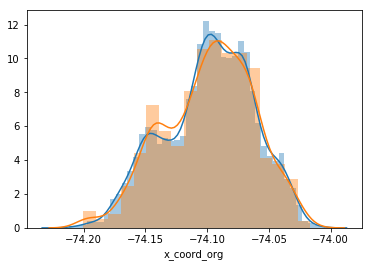

In [29]:
sns.distplot((gm.sample(10000))[0])
sns.distplot(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'x_coord_org'])

---
# Generating the bivariate gaussian mixture

In [30]:
n = 5
gmb =GaussianMixture(n, max_iter=10000)#, means_init=[(), (), ()])
gmb.fit(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), ['x_coord_org','y_coord_org']].values.reshape(-1, 2))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [31]:
x = np.linspace(-74.25, -74)
y = np.linspace(4.5, 4.75)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmb.score_samples(XX)
Z = Z.reshape(X.shape)

/Users/MikeW/.virtualenvs/uber/lib/python2.7/site-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


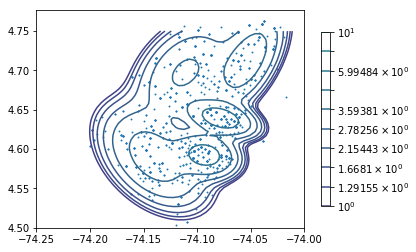

In [32]:
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=0.2, vmax=1000.0),
                 levels=np.logspace(0, 1, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), ['x_coord_org','y_coord_org']].values.reshape(-1, 2)[:, 0], df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), ['x_coord_org','y_coord_org']].values.reshape(-1, 2)[:, 1], .8)

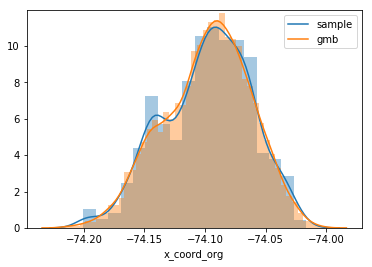

In [33]:
sns.distplot(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'x_coord_org'], kde_kws={"label":"sample"})
sns.distplot((gmb.sample(10000))[0].reshape(-1,2).T[0], kde_kws={"label":"gmb"})

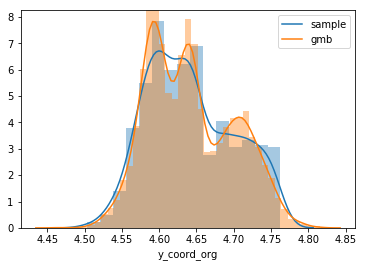

In [34]:
sns.distplot(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'y_coord_org'], hist=True, kde_kws={"label":"sample"})
sns.distplot((gmb.sample(10000))[0].reshape(-1,2).T[1], hist=True, kde_kws={"label": "gmb"},)

In [35]:
gmb.means_

array([[-74.11106197,   4.69747338],
       [-74.09214178,   4.59267593],
       [-74.05294728,   4.71329454],
       [-74.13992484,   4.58943424],
       [-74.07797641,   4.63923298]])

In [36]:
gmb.weights_

array([ 0.18953267,  0.18951009,  0.17510535,  0.2566412 ,  0.18921068])

In [37]:
gmb.covariances_

array([[[  5.68797475e-04,   3.04821747e-04],
        [  3.04821747e-04,   1.09659389e-03]],

       [[  2.00422772e-04,  -2.97223829e-05],
        [ -2.97223829e-05,   1.82249316e-04]],

       [[  2.80411037e-04,   2.97574458e-04],
        [  2.97574458e-04,   1.00467649e-03]],

       [[  5.98320979e-04,  -3.24531023e-04],
        [ -3.24531023e-04,   1.03644945e-03]],

       [[  2.37887568e-04,  -6.77895451e-05],
        [ -6.77895451e-05,   1.28929182e-04]]])

In [38]:
gaussian_mixture_sample = []
size = 1000

In [39]:
for i in range(n):
    gaussian_mixture_sample.extend(np.random.normal(loc=gmb.means_[i][0], size=int(size*gmb.weights_[i])))

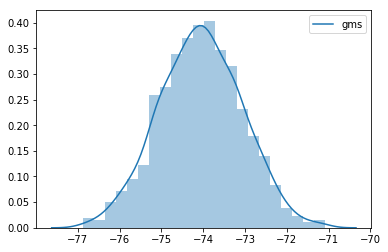

In [40]:
sns.distplot(gaussian_mixture_sample, kde_kws={"label":"gms"})
#sns.distplot((gmb.sample(10000))[0].reshape(-1,2).T[0], kde_kws={"label":"gmb"}, norm_hist=True, hist=False)

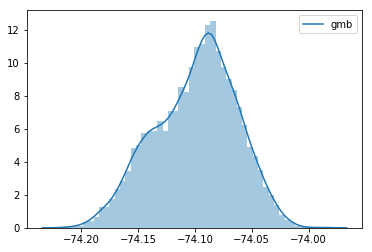

In [41]:
sns.distplot((gmb.sample(10000))[0].reshape(-1,2).T[0], kde_kws={"label":"gmb"}, norm_hist=True)

In [42]:
list2= []
list2.extend(np.random.normal(loc=-1, size=1000))
list2.extend(np.random.normal(loc=3, size=1000))

In [43]:
test = GaussianMixture(1, covariance_type="spherical", max_iter=1000)
test.fit(np.random.normal(loc=1, size=1000, scale=4.).reshape(1, -1))

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=1000, means_init=None, n_components=1, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [44]:
list3 = test.sample()[0]

In [45]:
test.covariances_

array([  1.00000004e-06])

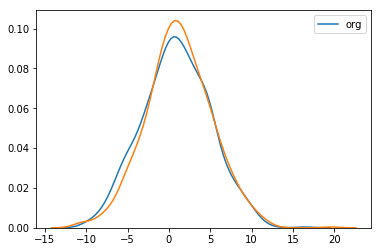

In [46]:
#sns.distplot(list3[0], hist=False, kde_kws={"label":"sample from kde"})
sns.distplot(np.random.normal(loc=1, size=1000, scale=4.), hist=False, kde_kws={"label":"org"})
sns.distplot(np.random.normal(loc=test.means_[0], scale=(test.covariances_[0]**0.5)), hist=False)#, kde_kws={"label","recon"});

---
# Reconstructing real data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

%matplotlib inline

In [31]:
df = pd.read_csv('encuesta_corregida.csv')

df = df.loc[(df.MUNICIPIO_DESTINO == 'BOGOTA-DC 11001') & (df.MUNICIPIO_ORIGEN == 'BOGOTA-DC 11001') & (df.MEDIO_PREDOMINANTE == 'TAXI')]
df.loc[df.HORA_FIN.str.contains("24:00:00"), "HORA_FIN"] = "00:00:00"
df.loc[:,'HORA_FIN'] = pd.to_datetime(df.HORA_FIN, format="%H:%M:%S")
df.loc[:,'HORA_INICIO'] = pd.to_datetime(df.HORA_INICIO, format="%H:%M:%S")

df = df.loc[(df.MUNICIPIO_DESTINO == 'BOGOTA-DC 11001') & (df.MUNICIPIO_ORIGEN == 'BOGOTA-DC 11001') & (df.MEDIO_PREDOMINANTE == 'TAXI')]

In [32]:
df.loc[:,'y_coord_org'] = (df.y_coord_org - df.y_coord_org.min()) / (df.y_coord_org.max() - df.y_coord_org.min()) * 30 / ((df.x_coord_org.max() - df.x_coord_org.min()) / (df.y_coord_org.max() - df.y_coord_org.min()))
df.loc[:,'x_coord_org'] = (df.x_coord_org - df.x_coord_org.min()) / (df.x_coord_org.max() - df.x_coord_org.min()) * 30

In [33]:
n = 12
gmb = GaussianMixture(n, max_iter=10000, covariance_type="spherical")
gmb.fit(df.loc[:,['x_coord_org','y_coord_org']].values.reshape(-1, 2));

In [34]:
gmb.weights_

array([ 0.18971829,  0.10064569,  0.07909496,  0.09362065,  0.05619398,
        0.09821954,  0.06493562,  0.02791981,  0.03550314,  0.04547666,
        0.15790326,  0.05076839])

In [35]:
cumulative_w = []
w = 0
for weight in gmb.weights_:
    w += weight
    cumulative_w.append(w)
    print w

0.189718293733
0.290363978829
0.369458942112
0.463079596618
0.519273580129
0.617493116535
0.682428740978
0.710348555389
0.745851693475
0.791328351944
0.94923161187
1.0


In [36]:
gmb.means_

array([[ 19.13448038,  16.8029903 ],
       [ 20.94741649,  29.63261917],
       [ 16.14736446,  24.07469064],
       [  8.68233295,  20.08508759],
       [ 24.38443448,  31.42055724],
       [ 12.57756812,  14.3052968 ],
       [ 12.31513157,  31.17362793],
       [ 25.45434927,  41.37807718],
       [ 15.34775153,   7.53823565],
       [ 17.38657108,  37.19854566],
       [ 21.65563521,  23.45145467],
       [ 26.03014297,  36.8599419 ]])

In [37]:
gmb.covariances_

array([ 4.94173797,  6.89641237,  5.03896476,  9.12148862,  4.31305434,
        7.99869204,  6.7205277 ,  2.46103608,  8.36663446,  7.03714949,
        2.94790144,  3.23922609])

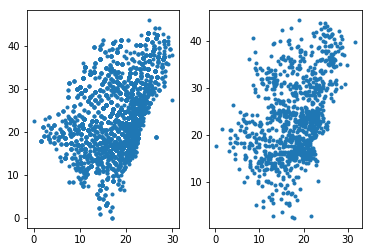

In [38]:
fig, axs = plt.subplots(1,2)
axs[0].plot(df.x_coord_org, df.y_coord_org, '.')
sample = gmb.sample(1000)[0].T
plt.plot(sample[0], sample[1],'.')

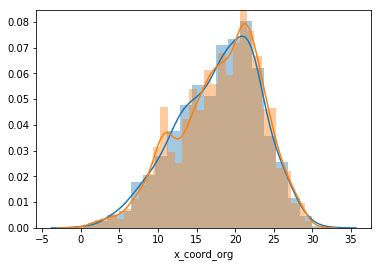

In [39]:
sns.distplot(sample[0])
sns.distplot(df.x_coord_org)

In [40]:
reconstruction_sample = []
size = 1500
for i in range(n):
    xs = np.random.normal(loc=gmb.means_[i][0], scale=(gmb.covariances_[i]**0.5), size=int(size*gmb.weights_[i]))
    ys = np.random.normal(loc=gmb.means_[i][1], scale=(gmb.covariances_[i]**0.5), size=int(size*gmb.weights_[i]))
    reconstruction_sample.extend(np.vstack((xs,ys)).T)
    
reconstruction_sample = np.array(reconstruction_sample)

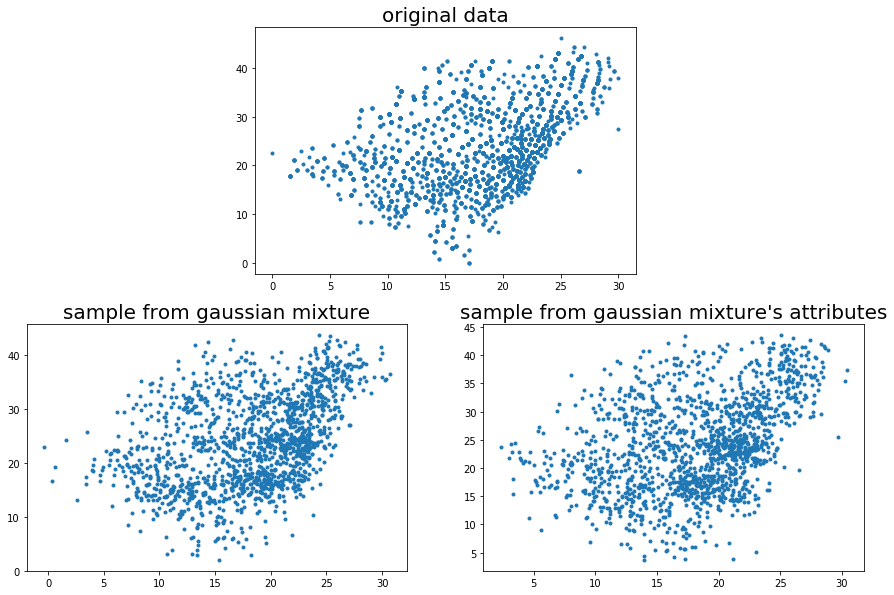

In [41]:
plt.close()

import matplotlib.gridspec as gridspec

plt.figure(figsize=[15,10])

gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, 1:3], )
ax2 = plt.subplot(gs[1, :2])
ax3 = plt.subplot(gs[1, 2:])

#fig, axs = plt.subplots(2,2)
ax1.plot(df.x_coord_org, df.y_coord_org, '.')
ax1.set_title("original data", fontsize=20)

sample = gmb.sample(size)[0].T
ax2.plot(sample[0], sample[1],'.')
ax2.set_title("sample from gaussian mixture", fontsize=20)

ax3.plot(reconstruction_sample.T[0], reconstruction_sample.T[1],'.')
ax3.set_title("sample from gaussian mixture's attributes", fontsize=20)

#fig.set_figwidth(40)

In [13]:
to_csv = pd.DataFrame(index=range(n), columns=['w','std','mean_x','mean_y'])

In [14]:
to_csv.loc[:,'w'] = cumulative_w
to_csv.loc[:,'std'] = gmb.covariances_ ** 0.5
to_csv.loc[:,['mean_x', 'mean_y']] = gmb.means_

In [15]:
to_csv.to_csv('netlogo_reader/org.csv')

In [16]:
to_csv

,w,std,mean_x,mean_y
0,0.105349,0.019502,-74.125764,4.581256
1,0.184346,0.012500,-74.065730,4.660171
2,0.254113,0.014584,-74.044052,4.740282
3,0.340824,0.022732,-74.102485,4.712153
4,0.448324,0.021369,-74.149808,4.616422
5,0.631419,0.014121,-74.077530,4.634695
6,0.783495,0.012970,-74.086798,4.594211
7,0.867045,0.014484,-74.055193,4.695230
8,0.899644,0.018545,-74.111534,4.535526
9,1.000000,0.022340,-74.118351,4.670062
